In [1]:
# Importando numpy, pandas e statsmodels:
import numpy as np
import pandas as pd
import statsmodels.api as sm

/home/andre/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
# Tenho o seguinte conjunto de dados, onde há valores de x, y e o desvio padrão de y.
# Primeiro faço uma string com os dados:
data = """
  x   y y_err
201 592    61
244 401    25
 47 583    38
287 402    15
203 495    21
 58 173    15
210 479    27
202 504    14
198 510    30
158 416    16
165 393    14
201 442    25
157 317    52
131 311    16
166 400    34
160 337    31
186 423    42
125 334    26
218 533    16
146 344    22
"""
# Depoiscoloco os dados numa tabela pandas:
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO
data = pd.read_csv(StringIO(data), delim_whitespace=True).astype(float)
data

,x,y,y_err
0,201.0,592.0,61.0
1,244.0,401.0,25.0
2,47.0,583.0,38.0
3,287.0,402.0,15.0
4,203.0,495.0,21.0
5,58.0,173.0,15.0
6,210.0,479.0,27.0
7,202.0,504.0,14.0
8,198.0,510.0,30.0
9,158.0,416.0,16.0


In [5]:
# Se eu quiser mostar só os 4 primeiros dados,faço:
data.head()

,x,y,y_err
0,201.0,592.0,61.0
1,244.0,401.0,25.0
2,47.0,583.0,38.0
3,287.0,402.0,15.0
4,203.0,495.0,21.0


In [6]:
exog = sm.add_constant(data['x'])
endog = data['y']
weights = 1. / (data['y_err'] ** 2)
wls = sm.WLS(endog, exog, weights)
results = wls.fit(cov_type='fixed scale')
print(results.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.400
Model:                            WLS   Adj. R-squared:                  0.367
Method:                 Least Squares   F-statistic:                     193.5
Date:                Fri, 18 Jan 2019   Prob (F-statistic):           4.52e-11
Time:                        14:38:18   Log-Likelihood:                -119.06
No. Observations:                  20   AIC:                             242.1
Df Residuals:                      18   BIC:                             244.1
Df Model:                           1                                         
Covariance Type:          fixed scale                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        213.2735     14.394     14.817      0.0

In [7]:
# You can use `scipy.optimize.curve_fit` to get the best-fit parameters and parameter errors.
from scipy.optimize import curve_fit

def f(x, a, b):
    return a * x + b

xdata = data['x']
ydata = data['y']
p0 = [0, 0] # initial parameter estimate
sigma = data['y_err']
popt, pcov = curve_fit(f, xdata, ydata, p0, sigma, absolute_sigma=True)
perr = np.sqrt(np.diag(pcov))
print('a = {0:10.3f} +- {1:10.3f}'.format(popt[0], perr[0]))
print('b = {0:10.3f} +- {1:10.3f}'.format(popt[1], perr[1]))

a =      1.077 +-      0.077
b =    213.273 +-     14.394


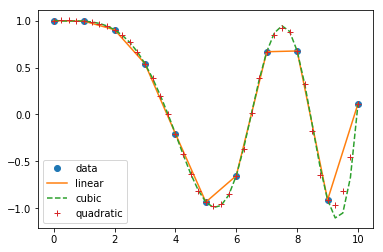

In [16]:
from scipy.interpolate import interp1d
%matplotlib inline
x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y, kind='linear')
f2 = interp1d(x, y, kind='cubic')
f3 = interp1d(x, y, kind='quadratic')
xnew = np.linspace(0, 10, num=41, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), '+')
plt.legend(['data', 'linear', 'cubic','quadratic'], loc='best')
plt.show()